In [3]:
% matplotlib inline

#### Week 2: Visualizations

In [4]:
import gdal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geotiling import GeoProps

In [5]:
gdal.SetCacheMax(2**30) # 1 GB

#### Survey Data

Take a look at our bucket files, and read the survey response files.

We note the following details for our dataset:

*Bangladesh*
- there are two surveys: one conducted in 2011 and one conducted in 2015
- the 2015 survey contains a superset of households in the 2011 survey
- however, households may have split up, which is why there are decimal places
- sampling: proportional to distribution of population [more on south, less in north]

*India*
- only one survey conducted in 2012
- village-level as opposed to household-level statistics

In [410]:
!head -n 20 ../data/bucket_files.txt 

total 59951805
-rw-r--r-- 1 tony tony    303032 Oct  9 17:38 Bangladesh_CE_2011.csv
-rw-r--r-- 1 tony tony    338626 Oct  9 17:38 Bangladesh_CE_2015.csv
-rw-r--r-- 1 tony tony 725954782 Oct  9 23:20 F182013.v4c_web.stable_lights.avg_vis.tif
-rw-r--r-- 1 tony tony  18901311 Oct  9 23:17 F182013.v4c_web.stable_lights.avg_vis.tif.gz
-rw-r--r-- 1 tony tony  78403136 Oct  9 17:38 India_pov_pop.csv
-rw-r--r-- 1 tony tony      4785 Oct  9 17:38 Readme_poverty.rtf
-rw-r--r-- 1 tony tony   2276712 Oct  9 17:38 l8_median_bangladesh_2011_multiband_500x500_1.0.tif
-rw-r--r-- 1 tony tony   2282172 Oct  9 17:38 l8_median_bangladesh_2011_multiband_500x500_10.0.tif
-rw-r--r-- 1 tony tony   2339729 Oct  9 17:38 l8_median_bangladesh_2011_multiband_500x500_100.0.tif
-rw-r--r-- 1 tony tony   2264301 Oct  9 17:38 l8_median_bangladesh_2011_multiband_500x500_1000.0.tif
-rw-r--r-- 1 tony tony   2266455 Oct  9 17:38 l8_median_bangladesh_2011_multiband_500x500_1001.0.tif
-rw-r--r-- 1 tony tony   2277458 Oct  9 

In [4]:
bangladesh_2011 = pd.read_csv("../data/bucket/Bangladesh_CE_2011.csv")
bangladesh_2015 = pd.read_csv("../data/bucket/Bangladesh_CE_2015.csv")
india = pd.read_csv("../data/bucket/India_pov_pop.csv")

In [6]:
bangladesh_2011.head(10)

,a01,totexp_m,div,district,lat,long
0,1,6680.309821,40,1,22.873333,89.846389
1,2,4131.571778,40,1,22.879444,89.843611
2,3,6563.881676,40,1,22.897222,89.842500
3,4,6997.186976,40,1,22.840833,89.877778
4,5,20516.593140,40,1,22.933611,89.878333
5,6,6498.950861,40,1,22.921667,89.881944
6,7,21168.695880,40,1,22.884167,89.866667
7,8,15705.416140,40,1,22.906944,89.871944
8,9,12397.738170,40,1,22.879444,89.888889
9,10,3717.469700,40,1,22.877222,89.887500


In [7]:
bangladesh_2015.head(10)

,a01,totexp_m,div,District,lat,long
0,1.0,7417.321289,40,1,22.873333,89.846389
1,2.0,5783.719238,40,1,22.879444,89.843611
2,3.0,3836.845459,40,1,22.897222,89.842500
3,4.0,14324.077150,40,1,22.840833,89.877778
4,5.0,21386.917970,40,1,22.933611,89.878333
5,6.0,7025.226074,40,1,22.921667,89.881944
6,7.0,16351.370120,40,1,22.884167,89.866667
7,8.0,20174.031250,40,1,22.906944,89.871944
8,9.0,5813.928223,40,1,22.879444,89.888889
9,10.1,10565.012700,40,1,22.874722,89.885833


In [432]:
bangladesh_2015[bangladesh_2015["totexp_m"] == 0].shape

(280, 6)

In [349]:
india.head()

,id,secc_hh,secc_pop,secc_pop_scaled,secc_cons,secc_pov_rate,secc_pov_rate_tend,secc_cons_per_hh,secc_cons_per_cap,secc_cons_per_cap_scaled,pc11_hh,pc11_pop,pc11_cons,longitude,latitude
0,1,228,1253,1089.150009,1.621371e+07,0.307018,0.267544,71112.77344,12939.915040,14886.575200,400,3770,28445110.0,73.841800,34.564534
1,2,505,3280,2802.100022,2.604503e+07,0.592079,0.510891,51574.32031,7940.558594,9294.826172,528,5255,27231242.0,73.964532,34.564775
2,3,167,1000,855.950006,9.295404e+06,0.526946,0.443114,55661.10156,9295.404297,10859.750980,354,3001,19704030.0,73.995868,34.542358
3,4,170,1093,924.250005,1.307742e+07,0.205882,0.100000,76926.02344,11964.706050,14149.227540,280,1310,21539286.0,74.047945,34.551184
4,5,426,1727,1524.100006,1.728787e+07,0.370892,0.342723,40581.84766,10010.345700,11343.000980,379,3080,15380520.0,74.216409,34.580932


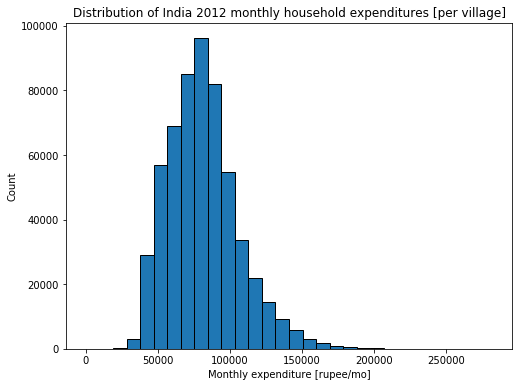

In [415]:
plt.figure(figsize=(8, 6))
plt.hist(india["secc_cons_per_hh"].dropna(), edgecolor="black", bins=30);
plt.title("Distribution of India 2012 monthly household expenditures [per village]")
plt.xlabel("Monthly expenditure [rupee/mo]")
plt.ylabel("Count");

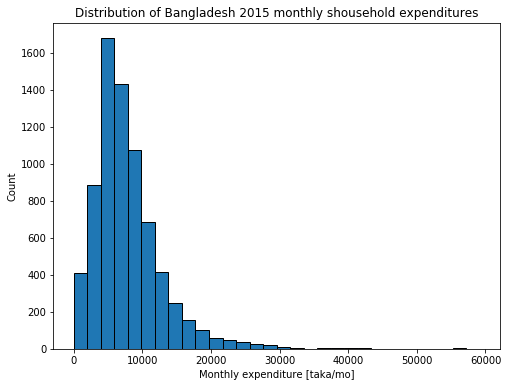

In [416]:
plt.figure(figsize=(8, 6))
plt.title("Distribution of Bangladesh 2015 monthly shousehold expenditures")
plt.xlabel("Monthly expenditure [taka/mo]")
plt.ylabel("Count")
plt.hist(bangladesh_2015["totexp_m"], edgecolor="black", bins=30);

#### Example Images

In [420]:
source_tiff = "../data/bucket/s1_median_bangladesh_vis_500x500_4321.0.tif"

In [421]:
gdal_tif = gdal.Open(source_tiff)

In [423]:
!gdalinfo ../data/bucket/s1_median_bangladesh_vis_500x500_1.0.tif

Driver: GTiff/GeoTIFF
Files: ../data/bucket/s1_median_bangladesh_vis_500x500_1.0.tif
Size is 500, 500
Coordinate System is:
PROJCS["WGS 84 / UTM zone 46N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",93],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32646"]]
Origin = (173901.988904717029072,2535467.692189364228398)
Pixel Size = (10.000000000000000,-10.00000000000000

In [424]:
A = gdal_tif.ReadAsArray()

In [425]:
A.shape

(3, 500, 500)

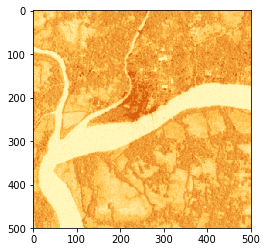

In [430]:
plt.imshow((A.transpose(1,2,0)).astype("uint8"))

#### Mean of each band in image versus response [LandSat]

In [151]:
source_tif = "../data/bucket/l8_median_bangladesh_multiband_500x500_%.1f.tif"

In [152]:
M = len(bangladesh_2015["a01"])
N = 6

In [153]:
band_means = np.zeros((M, N))

In [ ]:
for i, label in enumerate(bangladesh_2015["a01"]):
  gdal_tif = gdal.Open(source_tif % label)
  if not gdal_tif:
    continue
  img_data = gdal_tif.ReadAsArray()
  for j in range(6):
    band_means[i,j] = np.mean(img_data[j])

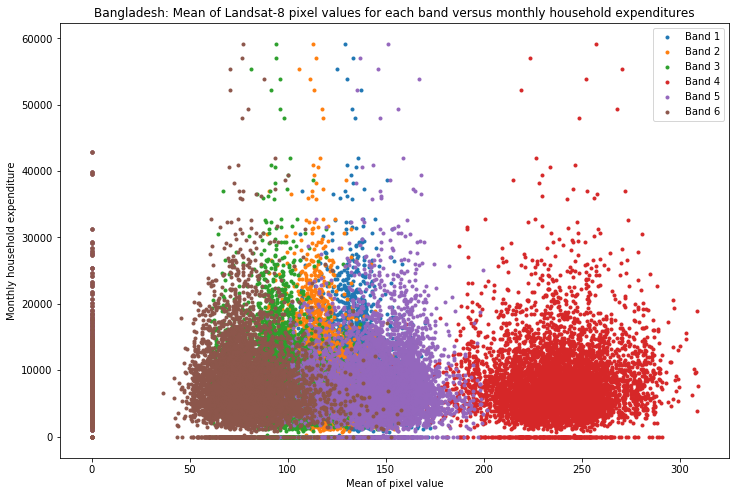

In [196]:
plt.figure(figsize=(12, 8))
for i in range(6):
  plt.scatter(band_means[:,i], bangladesh_2015["totexp_m"], marker=".", label="Band %d" % (i + 1))
plt.xlabel("Mean of pixel value")
plt.legend()
plt.ylabel("Monthly household expenditure")
plt.title("Bangladesh: Mean of Landsat-8 pixel values for each band versus monthly household expenditures");

In [205]:
pd.Series([bangladesh_2015["totexp_m"].corr(pd.Series(band_means[:,i])) for i in range(6)])

0   -0.043677
1   -0.051223
2   -0.064083
3    0.004157
4   -0.009947
5   -0.036664
dtype: float64

#### Distribution of pixel values per band

Text(0.5,1,'Distribution of pixel values across bands for a sample image.')

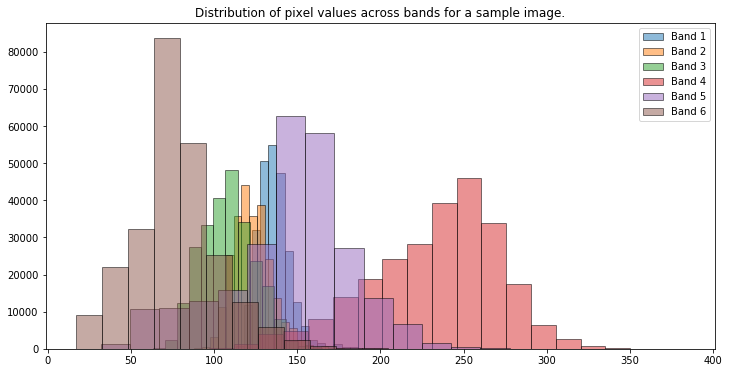

In [219]:
plt.figure(figsize=(12,6))
for i in range(6):
  plt.hist(img_data[i].flatten(), bins=20, edgecolor="black", alpha=0.5, label="Band %d" % (i+1))
  plt.legend()
plt.title("Distribution of pixel values across bands for a sample image.")

#### Night Lights

In [405]:
lights_tif = "../data/bucket/F182013.v4c_web.stable_lights.avg_vis.tif"

In [406]:
gdal_tif = gdal.Open(lights_tif)

In [135]:
props = GeoProps()
props.import_geogdal(gdal_tif)

In [140]:
!gdalinfo ../data/bucket/F182013.v4c_web.stable_lights.avg_vis.tif

Driver: GTiff/GeoTIFF
Files: ../data/bucket/F182013.v4c_web.stable_lights.avg_vis.tif
Size is 43201, 16801
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-180.004166666650008,75.004166666649994)
Pixel Size = (0.008333333300000,-0.008333333300000)
Metadata:
  AREA_OR_POINT=Area
  TIFFTAG_XRESOLUTION=1
  TIFFTAG_YRESOLUTION=1
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-180.0041667,  75.0041667) (180d 0'15.00"W, 75d 0'15.00"N)
Lower Left  (-180.0041667, -65.0041661) (180d 0'15.00"W, 65d 0'15.00"S)
Upper Right ( 180.0041652,  75.0041667) (180d 0'14.99"E, 75d 0'15.00"N)
Lower Right ( 180.0041652, -65.0041661) (180d 0'14.99"E, 65d 0'15.00"S)
Center      (  -0.0000007,   5.0000003) (  0d 0' 0.00"W,  5d 0' 0.00"N)
Band 1 

In [35]:
bangladesh_2015.iloc[0]

a01            1.000000
totexp_m    7417.321289
div           40.000000
District       1.000000
lat           22.873333
long          89.846389
Name: 0, dtype: float64

In [273]:
night_intensities = np.zeros(len(bangladesh_2015))

In [275]:
for i in range(len(bangladesh_2015)):
  lat = bangladesh_2015["lat"][i]
  lng = bangladesh_2015["long"][i]
  if np.isnan(lat) or np.isnan(lng):
    continue
  x, y = props.lonlat2colrow(lng, lat)
  night_intensities[i] = gdal_tif.ReadAsArray(x, y, 1, 1)

Text(0.5,1,'Distribution of night-time light intensities for Bangladesh households [DMSP]')

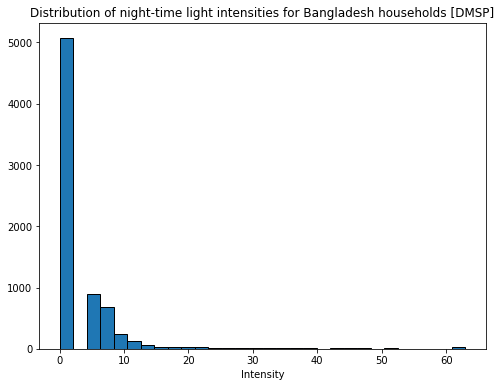

In [330]:
plt.figure(figsize=(8, 6))
plt.xlabel("Intensity")
plt.hist(night_intensities, edgecolor="black", bins=30)
plt.title("Distribution of night-time light intensities for Bangladesh households [DMSP]")

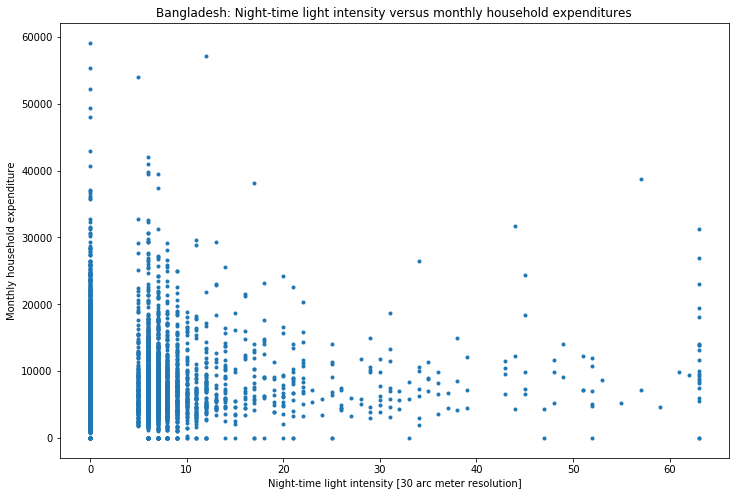

In [347]:
plt.figure(figsize=(12, 8))
plt.scatter(night_intensities, bangladesh_2015["totexp_m"], marker=".")
plt.xlabel("Night-time light intensity [30 arc meter resolution]")
plt.ylabel("Monthly household expenditure")
plt.title("Bangladesh: Night-time light intensity versus monthly household expenditures");

In [1]:
pd.Series(night_intensities).corr(bangladesh_2015["totexp_m"])

NameError: name 'pd' is not defined

In [335]:
x, y = props.lonlat2colrow(90.1959352984, 22.6341331408)

In [401]:
radius = 16 # 9 miles / 900 meters

In [408]:
A = gdal_tif.ReadAsArray(x - radius // 2, y - radius // 2, radius, radius)

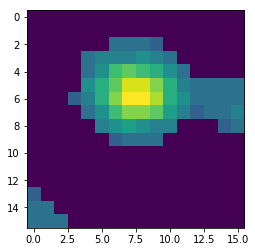

In [409]:
plt.imshow(A.astype("float"))